In [1]:
import tensorflow as tf
import numpy as np
import cv2
import glob

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

In [3]:
model = tf.keras.models.load_model('궤양성각막질환_DenseNet.h5')

In [4]:
mother_dir = '2.Validation\라벨링데이터\개\안구\일반\궤양성각막질환'
label_dict = {'무': 0, '유': 1}
data_0 = glob.glob(mother_dir + '/무/*.png')
data_1 = glob.glob(mother_dir + '/상/*.jpg')
data_2 = glob.glob(mother_dir + '/하/*.jpg')

In [5]:
from random import sample
n_sample = 100
zero = sample(data_0, n_sample)
one = sample(data_1, n_sample)
two = sample(data_2, n_sample)
# three = sample(data_3, n_sample)
valid = zero + one + two #+ three

In [6]:
from PIL import Image
x_valid = []
y_valid = [0] * n_sample + [1] * n_sample  + [2] * n_sample #+ [3] * n_sample
for i in valid:
    img = Image.open(i)
    img = img.convert('RGB')
    img = img.resize((224,224))
    img = np.array(img)
    x_valid.append(img)
    
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

In [7]:
model.evaluate(x_valid,y_valid)

10/10 [==============================] - 5s 102ms/step - loss: 0.8477 - accuracy: 0.8267


[0.847726583480835, 0.8266666531562805]

In [8]:
y_predict = np.argmax(model.predict(x_valid), axis = -1)

<function matplotlib.pyplot.show(close=None, block=None)>

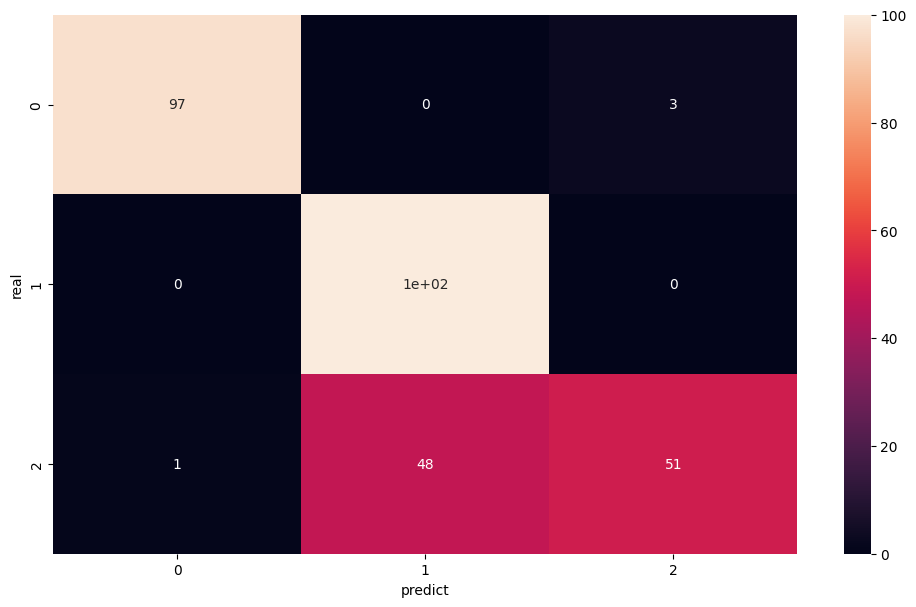

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# x_0은 label == 0인 데이터, x_1은 label == 1인 데이터만 모은 것
cf_matrix = confusion_matrix(y_valid, y_predict) / np.array([n_sample]).reshape(-1,1)

plt.figure(figsize = (12,7))
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('predict')
plt.ylabel('real')
plt.show